### Dataanalys av "housing.csv"

I denna Notebook genomförs en utforskande analys (EDA) av datasetet **housing.csv**. Målet är att undersöka datats struktur, kontrollera om det finns saknade värden, beräkna några nyckeltal och skapa olika visualiseringar för att se mönster i data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Läs in data 
df = pd.read_csv("housing.csv")

## Inspektion av data

In [9]:
# 8 första och sista rader
display(df.head(8))
display(df.tail(8))

# Information om kolumner och saknade
df.info()

# Statistik för numeriska kolumner
display(df.describe().T)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


## Saknade värden

In [11]:
# Saknade värden
print(df.isna().sum()[lambda x: x>0])

total_bedrooms    207
dtype: int64


In [13]:
# Ta bort rader med minst ett NaN
df.dropna(inplace=True)
print("\nEfter dropna():")
df.info()


Efter dropna():
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Deskriptiv statistik

In [17]:
print("Price (median_house_value):")
print(df["median_house_value"].describe())
print()
print("Income (median_income):")
print(df["median_income"].describe())

Price (median_house_value):
count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64

Income (median_income):
count    20433.000000
mean         3.871162
std          1.899291
min          0.499900
25%          2.563700
50%          3.536500
75%          4.744000
max         15.000100
Name: median_income, dtype: float64


## Visualisering av data

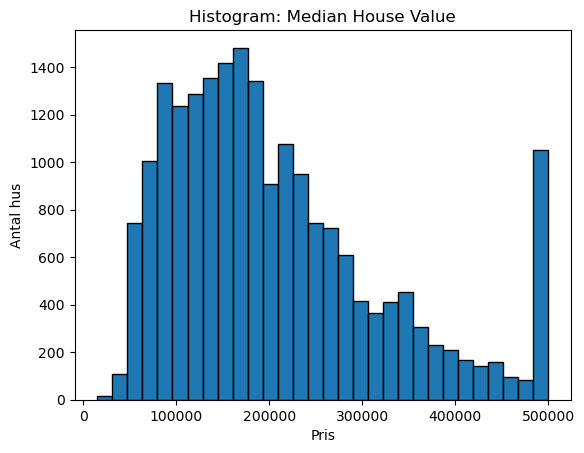

In [24]:
# Histogram över huspriser
plt.figure()
plt.hist(df["median_house_value"], bins=30, edgecolor="black")
plt.title("Histogram: Median House Value")
plt.xlabel("Pris")
plt.ylabel("Antal hus")
plt.show()

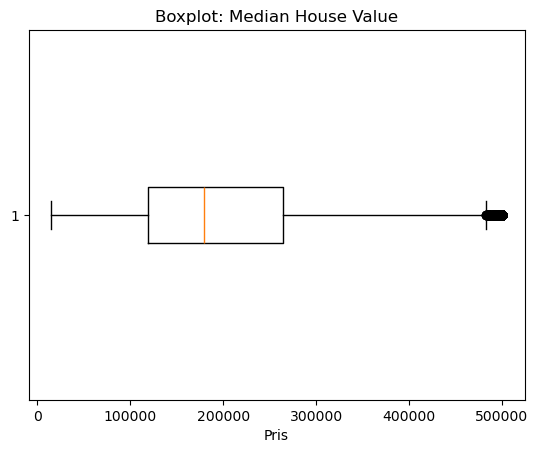

In [25]:
# boxplot för huspriser
plt.figure()
plt.boxplot(df["median_house_value"], vert=False)
plt.title("Boxplot: Median House Value")
plt.xlabel("Pris")
plt.show()

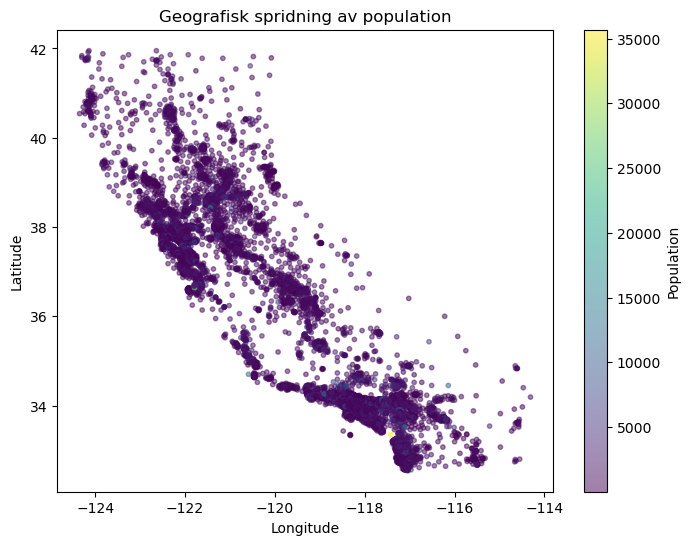

In [26]:
# Scatter: Geografi vs population
plt.figure(figsize=(8,6))
sc = plt.scatter(df["longitude"], df["latitude"], 
                 c=df["population"], cmap="viridis", s=10, alpha=0.5)
plt.colorbar(sc, label="Population")
plt.title("Geografisk spridning av population")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

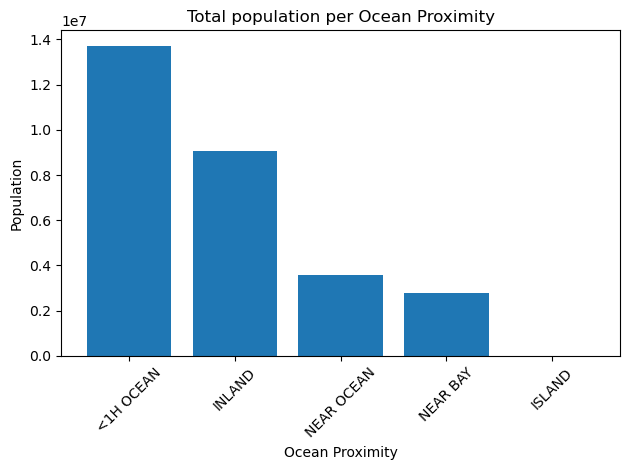

In [27]:
#Barplot: population per ocean_proximity
pop_per = df.groupby("ocean_proximity")["population"].sum().sort_values(ascending=False)
plt.figure()
plt.bar(pop_per.index, pop_per.values)
plt.title("Total population per Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

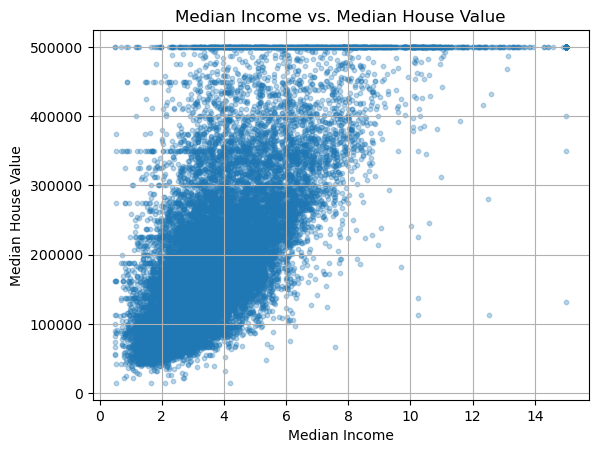

In [28]:
# Scatter: Income vs House Value
plt.figure()
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.3, s=10)
plt.title("Median Income vs. Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.grid(True)
plt.show()

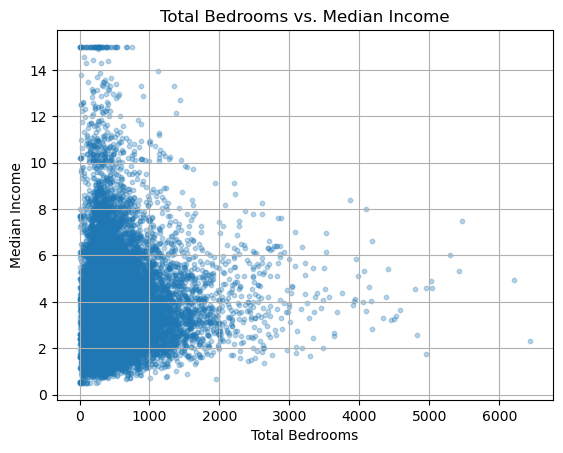

In [32]:
# Scatter: Bedrooms vs Income
plt.figure()
plt.scatter(df["total_bedrooms"], df["median_income"], alpha=0.3, s=10)
plt.title("Total Bedrooms vs. Median Income")
plt.xlabel("Total Bedrooms")
plt.ylabel("Median Income")
plt.grid(True)
plt.show()

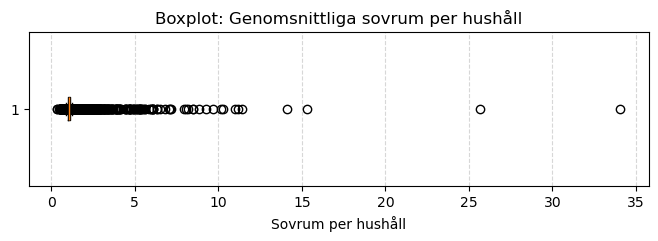

In [39]:
df["avg_bedrooms_per_household"] = df["total_bedrooms"] / df["households"]

# Boxplot
plt.figure(figsize=(8, 2))
plt.boxplot(df["avg_bedrooms_per_household"].dropna(), vert=False)
plt.title("Boxplot: Genomsnittliga sovrum per hushåll")
plt.xlabel("Sovrum per hushåll")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

In [40]:
print("Max total_rooms:", int(df["total_rooms"].max()))
print("Max total_bedrooms:", int(df["total_bedrooms"].max()))

Max total_rooms: 39320
Max total_bedrooms: 6445


## Slutsatser

- **Saknade värden:** Endast `total_bedrooms` hade ~207 NaN, borttagna.  
- **Pris & inkomst:** Medelpris ~206 856, max 500 001. Medianinkomst ~3.87.  
- **Geografi:** Hög befolkning nära kust och städer.  
- **Korrelation:**  
  - Inkomst vs. husvärde ≈ 0.69 (positiv)  
  - Sovrum vs. inkomst ≈ 0.10 (svagt positiv)  
- **Extrema rumvärden:** 39 320 rum, 6 445 sovrum — kan vara komplex eller felregister.

## 8. Självutvärdering

1. **Utmaningar:**  
   - Var väldigt brett av saker man kunde välja men googlade lite och kom fram till värdefulla visualiseringar av datan men tufft att avgränsa då det        finns så mycket. 
2. **Betyg:**  
   - Jag anser att jag har fyllt kraven för uppgiften och har med olika analyser så jag anser VG. Jag har stressat lite för att få ihop allt så              kunde lagt mer tid och ha med mer visualiseringar men jag tycker att detta räcker för att få en bra bild av värdena.
3. **Kommentar:**  
   - Bra upplägg och jag ser fram emot att fördjupa mig mer i detta framöver. 
